# The envelope of ballistic and elliptic orbits

In [12]:
import numpy as np
import matplotlib.pyplot as py
from DANIAL_MODULE import *

### The Family of Projectile Orbits
The families of projectile orbits are traced using midpoint method. For the projectile motion, the equations using the midpoint method are following.
\begin{equation}
     v_{n+1} = v_n +\tau a_n    
\end{equation}
\begin{equation}
     r_{n+1} = \tau v_n + \frac{1}{2} a_n \tau^{2}
\end{equation}
where v is velocity, r is position coordinate and $\tau$ is the time difference 

and for each coordinate, they are:
#### For x-coordinate
\begin{equation}
       v_{n+1} = v_n    
\end{equation}
\begin{equation}
     x_{n+1} = \tau v_n
\end{equation}
where v is the component of velocity in x-axis and since there is no component of force along x-axis, the acceleration in that direction is zero and hence the velocity stays constant and the simpler form of equations.
#### For y-coordinate
\begin{equation}
\begin{split}
v_{n+1} & = v_n -\tau g  \\
y_{n+1} & = \tau v_n + \frac{1}{2} - g \tau^{2}
\end{split}
\end{equation}
where v is the component of velocity in y-axis and the acceleration has the constant value of $-g$.

Employing these sets of equation and computing the values of the different components independently at time difference $\tau$ gives us the trajectory of the projectiles.

### Envelope of Projectile Trajectories
I found an elegant derivation method for the envelope of parabolic trajectories on stack exchange.
For particle with velocity $v$ and launching angle $\theta$ we have
\begin{equation}
     y = xtan(\theta) - \frac{gx^2}{2v^2}sec^2(\theta)
\end{equation}

We begin by considering the point of intersection between two trajectories with same lauching velocity but a small angle difference of $\epsilon$, so that our equations looks like
\begin{equation}
    xtan(\theta) - \frac{gx^2}{2v^2}sec^2(\theta) = xtan(\theta + \epsilon) - \frac{gx^2}{2v^2}sec^2(\theta + \epsilon)
\end{equation}

simplyfing it gives us
\begin{equation} 
\begin{split}
x & = \frac{2v^2}{g}. \frac{tan(\theta)-tan(\theta +\epsilon)}{sec^2(\theta)-sec^2(\theta+ \epsilon)} \\
 & = \frac{2v^2}{g}. \frac{tan(\theta)-tan(\theta +\epsilon)}{-\epsilon}. \frac{-\epsilon}{sec^2(\theta)-sec^2(\theta+ \epsilon)}
\end{split}
\end{equation}
and in the limit $\epsilon$ approaches to zero we get

\begin{equation} 
\begin{split}
x & = \frac{2v^2}{g}. \lim_{\epsilon \to 0} \frac{tan(\theta)-tan(\theta +\epsilon)}{-\epsilon}. \frac{-\epsilon}{sec^2(\theta)-sec^2(\theta+ \epsilon)} \\
 & = \frac{2v^2}{g}. \frac{sec^2(\theta}{2sec^2(\theta)tan(\theta)} \\
 & = \frac{v^2}{g} cot(\theta)
\end{split}
\end{equation}

and substituting the expression for x in the orignal equation for y gives us
\begin{equation}
y = \frac{v^2}{2} \left(2-\frac{1}{sin^2(\theta)}\right)
\end{equation}
from the previous equation for x and manipulating it gives 

\begin{equation}
\begin{split}
\left(\frac{gx}{v^2} \right)^2 & = \frac{cos^2(\theta)}{\sin^2(\theta)} \\
 & = \frac{1-sin^2(\theta)}{\sin^2(\theta)} \\
 & = \frac{1}{\sin^2(\theta)} - 1 \\
 \frac{1}{\sin^2(\theta)} & = \left(\frac{gx}{v^2} \right)^2 +1  
\end{split}
\end{equation}

plugging it back into the equation for y gives us the y values on the envelope as a function of x 
\begin{equation}
 y = \frac{v^2}{2g} - \frac{g}{2v^2}x^2
\end{equation}


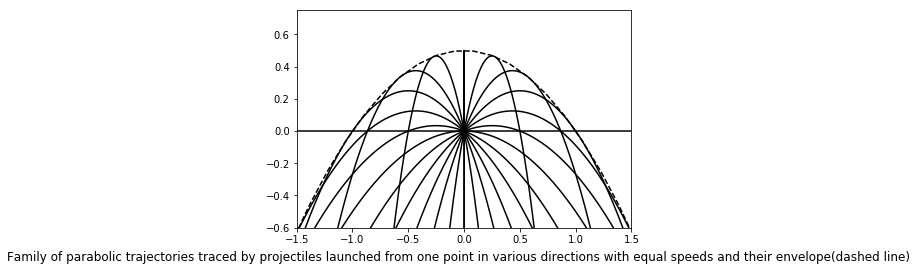

In [3]:
py.figure(1)
py.axhline(0,color='black') # x = 0
py.ylim([-0.6, 0.75])
py.xlim(-1.5, 1.5)
plotParabolas(1)
envParabola(1);
text ='Family of parabolic trajectories traced by projectiles launched from one point \
in various directions with equal speeds and their envelope(dashed line)'
py.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12);

### Family of Elliptic orbits
The trajectories for the elliptical trajectories are traced using Leapfrog method for which the basic equations are as follows 
\begin{equation}
\begin{split}
v_{n+1} & = v_{n-1} + 2\tau a_n \\
r_{n+2} & = r_n + 2\tau v_{n+1}
\end{split}
\end{equation}
for the scaled acceleration in x and y direction, from the lecture notes we have
\begin{equation}
\begin{split}
a_x & = \frac{-4\pi^2}{(x^2+y^2)^{3/2}}x \\
a_y & = \frac{-4\pi^2}{(x^2+y^2)^{3/2}}y
\end{split}
\end{equation}
plugging these expressions for $a_x$ and $a_y$ into the above Leapfrog equations we get
for x-axis
#### For x-coordinate
\begin{equation}
\begin{split}
v_{n+1} & = v_{n-1} + 2\tau \frac{-4\pi^2}{(x_n^2+y_n^2)^{3/2}}x_n\\
x_{n+2} & = x_n + 2\tau v_{n+1}
\end{split}
\end{equation}
where v is the x component of velocity and for y-axis we have
#### For y-coordinate
\begin{equation}
\begin{split}
v_{n+1} & = v_{n-1} + 2\tau \frac{-4\pi^2}{(x_n^2+y_n^2)^{3/2}}y_n\\
y_{n+2} & = y_n + 2\tau v_{n+1}
\end{split}
\end{equation}
where v is the y component of velocity.
Employing the above sets of equations and using our beloved Euler's method as a kick-starter, we get the trajectory of the elliptical orbits.  

### Envelope of Elliptic Trajectories
The paper assigned to me proves by geometric arguments that the envelope of elliptic trajectories is an ellipsed whose foci are the center of the body of mass(e.g Earth) exerting force and the other point being the point from where the object is launched. To find the semi-major axis we use energy conservation and find the point farthest from Earth which we call $r_{max}$ as shown below.
\begin{equation}
\frac{v_0^2}{2}-\frac{GM}{r_0} = -\frac{GM}{r_{max}}
\end{equation}
where $v_0$ and $r_0$ are the initial velocity and initial distance from Earth respectively and since 

\begin{equation}
v_{esc} = \sqrt{2GM/r_0} = \sqrt{2}v_{circ}
\end{equation}

where $v_{esc}$ is the escape velocity and $v_{circ}$ is the initial velocity for a circular orbit.
Rearranging the initial equation gives

\begin{equation}
r_{max} = \frac{r_0}{1- \left(\frac{v_0}{\sqrt{2}v_{circ})} \right)^2}
\end{equation}
where in our case for scaled dimensions
\begin{equation}
v_{circ} = 2\pi \sqrt{1/r}
\end{equation}
thus the semi-major axis, which we call b is

\begin{equation}
b = r_{max}-r_0/2
\end{equation}
and semi-minor axis, which we call a is

\begin{equation}
a = \sqrt{b^2 - \left(\frac{r_0}{2}\right)^2}
\end{equation}

using these parameters and plugging into the equations of ellipse

\begin{equation}
\begin{split}
x & = a cos(\theta) \\
y & = b sin(\theta)
\end{split}
\end{equation}

and calculating it for range of values of $\theta$ gives us the envelope of elliptical orbits.

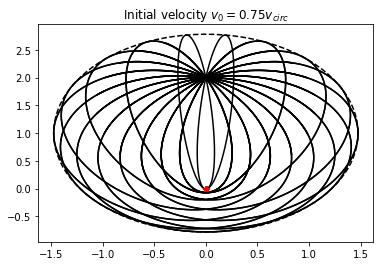

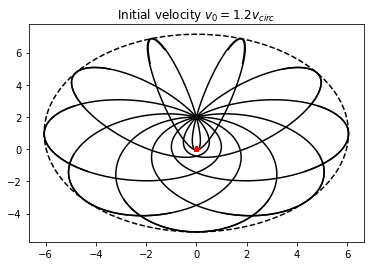

In [4]:
py.figure(2)
py.title(r'Initial velocity $v_0 = 0.75v_{circ}$ ')
plotEllipse(0.75,2)
py.figure(3)
py.title(r'Initial velocity $v_0 = 1.2v_{circ}$ ')
plotEllipse(1.2,5, theta_diff=np.pi/9)

### Calculating the point an object hits if fired from north pole of a spherical planet
Verlet method was used to calculate the trajectory with Euler's method as the ignition. It was chosen because of its simplicity as only acceleration was needed to calculate the spatial coordinates as shown below

\begin{equation}
r_{n+1} = 2r_n - r_{n-1} + \tau^2 a_n
\end{equation}
for the scaled acceleration in x and y direction, from the lecture notes we have
\begin{equation}
\begin{split}
a_x & = \frac{-4\pi^2}{(x^2+y^2)^{3/2}}x \\
a_y & = \frac{-4\pi^2}{(x^2+y^2)^{3/2}}y
\end{split}
\end{equation}
plugging these expressions for $a_x$ and $a_y$ into the above Verlet equation we get
\begin{equation}
\begin{split}
x_{n+1} & = 2r_n - r_{n-1} + \tau^2 \frac{-4\pi^2}{(x_n^2+y_n^2)^{3/2}}x_n \\
y_{n+1} & = 2r_n - r_{n-1} + \tau^2\frac{-4\pi^2}{(x_n^2+y_n^2)^{3/2}}y_n
\end{split}
\end{equation}
The program uses the above two equations to calulate the x and y coordinates until it hits the surface of the planet and outputs coordinate of that point and time elapsed since it launch. In the case it escapes the orbit, it returns None and prints a message saying so.

In [2]:
x,y,t = targetCalcVerlet(np.pi/4,2,2)
print('The x,y coordinates are ({0:0.2f},{1:1.2f})  \nTime elapse is {2:2.2f}'.format(x,y,t))

The x,y coordinates are (0.45,1.95)  
Time elapse is 0.34


### Volume contained by the envelope of parabolic trajectories 
Due to symmetry, volume formed by the paraboloid is rotation of the parabola by $\pi$. This simplifies the problem to the integral just under the area fromed by the envelope of paraboloid derived above. The integral is calculated using Monte-Carlo integration method for the cross-sectional area and the volume can be calculated by multilping the area by $\pi$. 

The volume of safety of paraboloid is 2.15


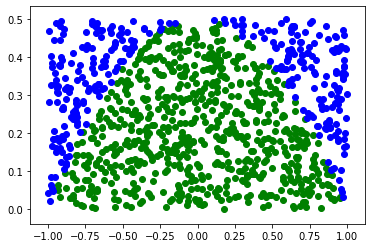

In [3]:
volume = volPara(1000,1)
print('The volume of safety of paraboloid is {0:0.2f}'.format(volume))

### Volume contained by the envelope of elliptic trajectories
Exploiting symmetry of the system, the volume can be found by the rotation of the sphere by $\pi$. To simplify the  problem, the cross-section is divided by a horizonatal line into two equally symmetrical parts. Applying Monte-Carlo method for the upper halve of the sphere and multiplying it by two gives the area of whole cross-section and then multiplying it by $\pi$ gives us the volume contained by the spheroid.   

The volume of safety of spheroid is 20.85


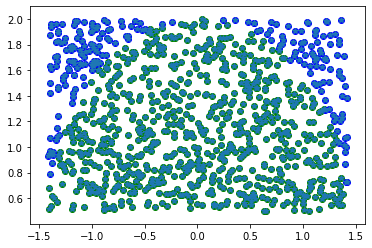

In [4]:
volume = volEllipse(1000,1)
print('The volume of safety of spheroid is {0:0.2f}'.format(volume))